In [1]:
from simmit import smartplus as sim
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
%matplotlib notebook

# Visualisaztion of a field on an ellipsoid

The following notebook explains how to visualize a scalar field on an ellispoid. Such visualization can be usefull to analyze criterion depending on interface fields (i.e. stress or strain)

<IPython.core.display.Javascript object>


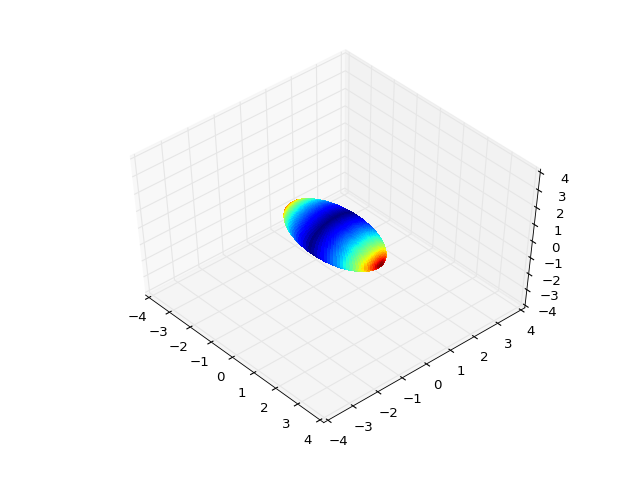

In [5]:
a1 = 6
a2 = 3
a3 = 1

N_max = 50
tau_max = 60
n_exp = 0.5

window = max(a1,a2,a3)

u_n = 100
v_n = 100

u = np.linspace(0, 2 * np.pi, u_n)
v = np.linspace(0, np.pi, v_n)

X = a1 * np.outer(np.cos(u), np.sin(v))
#xlen = len(X)
Y = a2 * np.outer(np.sin(u), np.sin(v))
#ylen = len(Y)
Z = a3 * np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sigma = np.array([100.0,0.,0.,0.,0.,0.]

                 N = np.ndarray(shape=(u_n,v_n))
tau = np.ndarray(shape=(u_n,v_n))
for i, u_i in enumerate(u):
    for j, v_j in enumerate(v):
        N[i,j] = sim.sigma_int(sigma, a1, a2, a3, u_i, v_j)[0]
        tau[i,j] = sim.sigma_int(sigma, a1, a2, a3, u_i, v_j)[1]        

crit = ((N/M_max)**2.0+(tau/tau_max)**2.0)**n_exp
crit_norm = crit/crit.max()  # normalize 0..1
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,facecolors=cm.jet(crit_norm),linewidth=0, antialiased=False, shade=False)
ax.set_xlim3d(-2.*window, 2.*window)
ax.set_ylim3d(-2.*window, 2.*window)
ax.set_zlim3d(-2.*window, 2.*window)

plt.show()


<IPython.core.display.Javascript object>


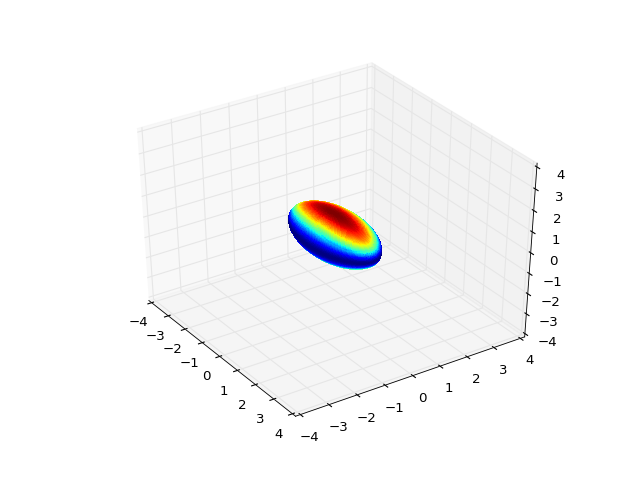

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
sigma = np.array([0.,0.,50.0,0.,0.,0.])
N = np.ndarray(shape=(u_n,v_n))
tau = np.ndarray(shape=(u_n,v_n))
for i, u_i in enumerate(u):
    for j, v_j in enumerate(v):
        N[i,j] = sim.sigma_int(sigma, a1, a2, a3, u_i, v_j)[0]
        tau[i,j] = sim.sigma_int(sigma, a1, a2, a3, u_i, v_j)[1]        

crit = (N**2.0+tau**2.0)**0.5
crit_norm = crit/crit.max()  # normalize 0..1
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,facecolors=cm.jet(crit_norm),linewidth=0, antialiased=False, shade=False)
ax.set_xlim3d(-2.*window, 2.*window)
ax.set_ylim3d(-2.*window, 2.*window)
ax.set_zlim3d(-2.*window, 2.*window)

plt.show()